# Agora Data Exploration
This notebook will give a brief overview of what the Agora dataset, publicly available via [Kaggle](https://www.kaggle.com/philipjames11/dark-net-marketplace-drug-data-agora-20142015), looks like. This is a scraped dataset about the Agora marketplace, which can be found on the dark web in order to purchase various illegal goods and services.

Afterwards, there will be an in-depth view and analyzation in the following chapters.

In [1]:
import pandas as pd
import matplotlib as plt

df = pd.read_csv("darkweb/data/agora.csv")
df.head()

,Vendor,Category,Item,Item Description,Price,Origin,Destination,Rating,Remarks
0,CheapPayTV,Services/Hacking,12 Month HuluPlus gift Code,12-Month HuluPlus Codes for $25. They are wort...,0.05027025666666667 BTC,Torland,NaN,4.96/5,NaN
1,CheapPayTV,Services/Hacking,Pay TV Sky UK Sky Germany HD TV and much mor...,Hi we offer a World Wide CCcam Service for En...,0.152419585 BTC,Torland,NaN,4.96/5,NaN
2,KryptykOG,Services/Hacking,OFFICIAL Account Creator Extreme 4.2,Tagged Submission Fix Bebo Submission Fix Adju...,0.007000000000000005 BTC,Torland,NaN,4.93/5,NaN
3,cyberzen,Services/Hacking,VPN > TOR > SOCK TUTORIAL,How to setup a VPN > TOR > SOCK super safe enc...,0.019016783532494728 BTC,NaN,NaN,4.89/5,NaN
4,businessdude,Services/Hacking,Facebook hacking guide,. This guide will teach you how to hack Faceb...,0.062018073963963936 BTC,Torland,NaN,4.88/5,NaN


As shown, the raw dataset contains multiple columns, consisting of 
 - Vendor, meaning the seller of the good/service
 - Category, consisting of up to three levels (main, subcategory and subsubcategory)
 - Item
 - Item Description
 - Price
 - Origin
 - Destination
 - Rating
 - Remarks

In [2]:
len(df)

109590

## General overview
This chapter will give a general overview of what the dataset looks like, for example how many records it contains, but also what categories, etc.

### Searching for outliars
Not all data will be clean upon retrieval, so this needs to be cleaned aswell. First, the dataset needs to be searched for any incompletions and/or inconsistensies.

In [3]:
df[' Category'].value_counts()

Drugs/Cannabis/Weed                                                         21270
Drugs/Ecstasy/Pills                                                          7532
Drugs/Ecstasy/MDMA                                                           6116
Drugs/Stimulants/Cocaine                                                     6007
Drugs/Prescription                                                           5561
                                                                            ...  
Drugs/Dissociatives/PCP                                                         4
the Body Bags  shotty  and Mac make-up To: Kind Hearts and Gentle People        1
0.12780125125 BTC                                                               1
the Body Bags  shotty  and mag To: Kind Hearts and Gentle People                1
home of the Body Bags  shotty  and mag  Kind Hearts and Gentle People           1
Name:  Category, Length: 108, dtype: int64

As shown above, something went wrong during the parsing of the dataset because the last four categories, containing the 'Body Bags shotty' text, are actually Items or Item Descriptions.

In [5]:
df.dropna(axis = 0, how = 'any', thresh = None, subset = None, inplace = False)
cat = df.drop_duplicates(subset =' Category', keep = 'first')
cat[' Category'][1:60]

29                                          Services/Other
124                                              Drugs/RCs
741                           Forgeries/Physical documents
838                                         Tobacco/Smoked
1027                                        Services/Money
1337                                    Counterfeits/Money
1389                                         Data/Software
1467                                         Data/Accounts
1601                                 Counterfeits/Clothing
1795                                    Information/eBooks
2277                                           Electronics
2360                              Drug paraphernalia/Pipes
2409                                     Drugs/Weight loss
2473                                          Data/Pirated
2547                                        Drugs/Steroids
3104                                    Drugs/Prescription
4161                                    Information/Guid

In [6]:
df[' Category'].nunique() #number of unique values

108

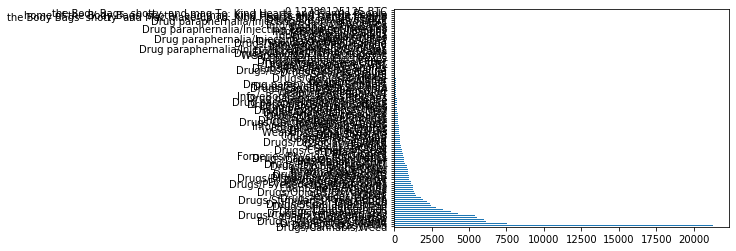

In [9]:
df[' Category'].value_counts().plot(kind='barh')

### Remarks column
As shown below, it is not needed to take any other column into account for the learning process, since the only valuable variables are 'item' and 'item description'. Looking at the remarks column in order to check for any additional information, it shows that the only extra information that will be provided is 

'average price may be skewed'.

This is also what is stated on Kaggle about the data description, but I wanted to be sure about what the unique values are in this whole column. Looking at the other records that are showed, it shows that some columns are wrongfully written down, like record 56230, where there are two item descriptions, so that the BTC price will be noted down in de 'origin' column.


In [8]:
df.dropna(axis = 0, how = 'any', thresh = None, subset = None, inplace = False)
remarks = df.drop_duplicates(subset =' Remarks', keep = 'first')
remarks

,Vendor,Category,Item,Item Description,Price,Origin,Destination,Rating,Remarks
0,CheapPayTV,Services/Hacking,12 Month HuluPlus gift Code,12-Month HuluPlus Codes for $25. They are wort...,0.05027025666666667 BTC,Torland,NaN,4.96/5,NaN
29,livinglarge,Services/Other,custom 2nd hotel+flight,penthouse suite las vegas + 5 roundtrips,6.895965219913043 BTC,NaN,NaN,5.00/5,Average price may be skewed outliar > .5 BTC f...
56230,snapback,Drugs/Cannabis/Weed,50g Durban Poison - 100% Sativa,This subtropical sativa is named after the Sou...,"5g ""Skywalker"" Indica-dominant hybrid (Bluebe...",0.1564969883333333 BTC,Germany,Worldwide,4.91/5
56490,snapback,Drugs/Cannabis/Weed,10g Durban Poison - 100% Sativa,This subtropical sativa is named after the Sou...,"*****""Planning a FUN weekend? Now offering...U...",1.80935569 BTC,USA,USA,4.90/5
58889,PerfectScans,Forgeries/Scans/Photos,Anon Bank 120K PA Cash Out/Load Set Up,This Listing Is For Verified And Established V...,16 grams PURE UNCUT Morphine HCL Powder no n...,1.1951948575000004 BTC,USA,NaN,4.41/5
106933,Petch,Drugs/Cannabis/Weed,Super Iced Grapefruit 3.5G,This potent sativa was developed by crossing C...,Reggie is what ppl call mexican weed in my are...,0.06149737 BTC,USA,NaN,[0 deals]
